# K-NEAREST NEIGHBORS (Classification) AND SCIKIT-LEARN

## AGENDA

- **K-nearest neighbors (KNN)**
    - Review of the iris dataset
    - KNN classification
    - Review of supervised learning
- **scikit-learn**
    - Requirements for working with data in scikit-learn
    - scikit-learn's 4-step modeling pattern
    - Tuning a KNN model
    - Comparing KNN with other models

## REVIEW OF THE IRIS DATASET

In [1]:
# read the iris data into a DataFrame
import pandas as pd
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, names=col_names)

In [2]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
iris.species.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [4]:
type(iris)

pandas.core.frame.DataFrame

In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### TERMINOLOGY

- **150 observations** (n=150): each observation is one iris flower
- **4 features** (p=4): sepal length, sepal width, petal length, and petal width
- **Response**: iris species
- **Classification problem** since response is categorical

## HUMAN LEARNING ON THE IRIS DATASET

How did we (as humans) predict the species for iris flowers?

1. We looked for features that seemed to correlate with the response.
2. We created a set of rules (using those features) to predict the species of an unknown iris.

More generally:

1. We observed that the different species had (somewhat) dissimilar measurements.
2. We predicted the species for an unknown iris by:
    - Looking for irises in the data with similar measurements
    - Assuming that our unknown iris is the same species as those similar irises

In [6]:
# allow plots to appear in the notebook
%matplotlib inline

# create a custom colormap
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# map each iris species to a number
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


<Axes: ylabel='Frequency'>

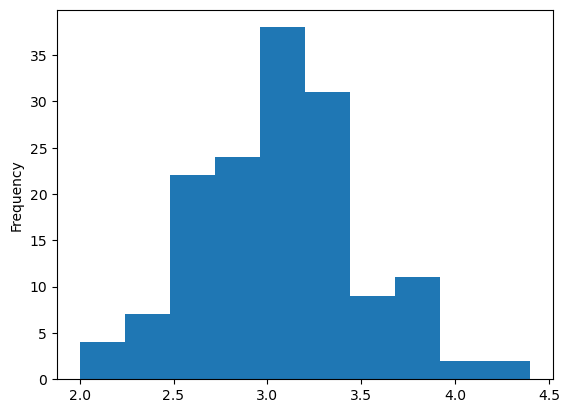

In [8]:
iris.sepal_width.plot(kind='hist')

<Axes: xlabel='petal_length', ylabel='petal_width'>

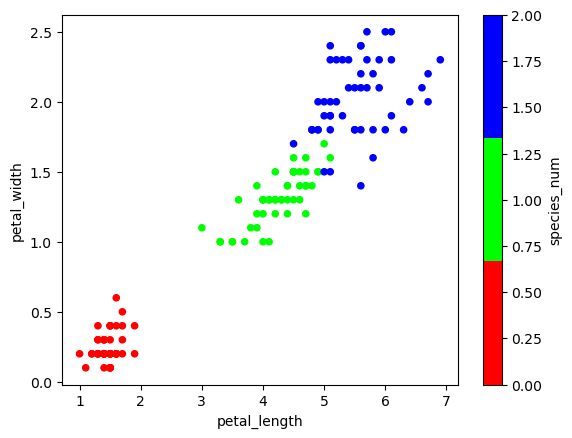

In [9]:
# create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap=cmap_bold)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

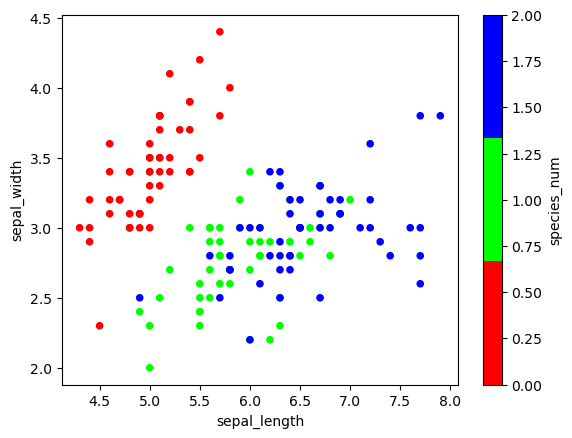

In [10]:
# create a scatter plot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap=cmap_bold)

## K-nearest neighbors (KNN) classification

### HOW DOES KNN WORK?

<img src='./knn-voting.png' />

1. Pick a value for K.
2. Search for the K observations in the data that are "nearest" to the measurements of the unknown iris.
    - Euclidian distance is often used as the distance metric, but other metrics are allowed.
3. Use the most popular response value from the K "nearest neighbors" as the predicted response value for the unknown iris.

**Question:** What's the "best" value for K in this case?

**Answer:** The value which produces the most accurate predictions on unseen data. We want to create a model that generalizes!

## REVIEW OF THE SUPERVISED LEARNING

![Supervised learning diagram](supervised_learning.png)

## REQUIREMENTS FOR WORKING WITH DATA IN SCIKIT-LEARN

1. Features and response are **separate objects**
2. Features and response should be entirely **numeric**
3. Features and response should be **NumPy arrays** (or easily convertible to NumPy arrays)
4. Features and response should have **specific shapes** (outlined below)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
39,5.1,3.4,1.5,0.2,Iris-setosa,0
115,6.4,3.2,5.3,2.3,Iris-virginica,2
36,5.5,3.5,1.3,0.2,Iris-setosa,0
29,4.7,3.2,1.6,0.2,Iris-setosa,0
54,6.5,2.8,4.6,1.5,Iris-versicolor,1
107,7.3,2.9,6.3,1.8,Iris-virginica,2
119,6.0,2.2,5.0,1.5,Iris-virginica,2
40,5.0,3.5,1.3,0.3,Iris-setosa,0
46,5.1,3.8,1.6,0.2,Iris-setosa,0
76,6.8,2.8,4.8,1.4,Iris-versicolor,1


In [13]:
# store feature matrix in "X"
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]

In [39]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=1)

In [15]:
feature_cols = ['petal_length', 'petal_width'] 


# petal lenght and petal width are what we want to use becuase this 
# feature is the best at showing the differences between the target categories. The 3 species are clearly defined by
# petal length. 
# 1. We looked for features that seemed to correlate with the response.
# >>>>> These features correlate with the classes. and they separate the classes. That is why we use them


X = iris[feature_cols]
y = iris.species_num
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [16]:
# import numpy as np

iris_test = [[3, 5]] # petal lenght is 3 and petal width is 5

print (knn.predict(iris_test))
print (knn.predict_proba(iris_test))



# 2 is iris verginica so it predicted correctly
# predict is the category
# probabilty is how confident it is in that category
# probabilty has 3 values. each is a catergory ie 0 for 0 and 0 for 1 and 100 percent for 2

[2]
[[0. 0. 1.]]


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [17]:
X

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [18]:
# alternative ways to create "X"
X = iris.drop(['species', 'species_num'], axis=1) # drop these columns
X = iris.loc[:, 'sepal_length':'petal_width'] # all rows first, then everything from speal length to sepal width
X = iris.iloc[:, 0:4]  # all rows and all columns 0 thru 4th column not inclusive

# Dont forget you always need to separte the input columns from the output column. To make an X and y.

In [19]:
# store response vector in "y"
y = iris.species_num

In [46]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species_num, Length: 150, dtype: int64

In [20]:
# check X's type
print (type(X))

<class 'pandas.core.frame.DataFrame'>


In [21]:
print (type(X.values))

<class 'numpy.ndarray'>


In [22]:
# check y's type
print (type(y))
# serires is a one dimensional with index, pandas version of a vector.

<class 'pandas.core.series.Series'>


In [23]:
print (type(y.values))

<class 'numpy.ndarray'>


In [24]:
# check X's shape (n = number of observations, p = number of features)
print (X.shape)

(150, 4)


In [25]:
# check y's shape (single dimension with length n)
print (y.shape)

(150,)


## SCIKIT-LEARN'S 4-STEP MODELING PATTERN 

**Step 1:** Import the class you plan to use

In [26]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for "model"
- "Instantiate" means "make an instance of"

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)

- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

In [28]:
print (knn)

KNeighborsClassifier(n_neighbors=1)


**Step 3:** Fit the model with data (aka "model training")

- Model is "learning" the relationship between X and y in our "training data"
- Process through which learning occurs varies by model
- Occurs in-place

In [29]:
help(knn)

Help on KNeighborsClassifier in module sklearn.neighbors._classification object:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neigh

In [30]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

- Once a model has been fit with data, it's called a "fitted model"

**Step 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

In [31]:
import numpy as np

flower_dimensions = [[3, 5, 4, 2]]
knn.predict(flower_dimensions)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2])

- Returns a NumPy array, and we keep track of what the numbers "mean"
- Can predict for multiple observations at once

In [32]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2, 1])

In [33]:
knn.predict_proba(X_new)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0., 0., 1.],
       [0., 1., 0.]])

## TUNING A KNN MODEL

In [34]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
knn.predict(X_new)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 1])

In [35]:
# calculate predicted probabilities of class membership
knn.predict_proba(X_new)

# 80 percent confident for the middle and 20 percent for the last class. 
# increased nearest nighbors and now there is more information to factor.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0. , 0.8, 0.2],
       [0. , 1. , 0. ]])

In [36]:
# print distances to nearest neighbors (and their identities)
flower_dimensions = [[3, 5, 4, 2]]
knn.kneighbors(flower_dimensions)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[3.19374388, 3.20312348, 3.24037035, 3.35559235, 3.35559235]]),
 array([[106,  84,  59,  88,  66]]))

In [37]:
import numpy as np

flower_dimensions = [[3, 5, 4, 2]]
neighbors = knn.kneighbors(flower_dimensions)
neighbors_list = np.ravel(neighbors[1])
iris[iris.index.isin(neighbors_list)]

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,species,species_num
59,5.2,2.7,3.9,1.4,Iris-versicolor,1
66,5.6,3.0,4.5,1.5,Iris-versicolor,1
84,5.4,3.0,4.5,1.5,Iris-versicolor,1
88,5.6,3.0,4.1,1.3,Iris-versicolor,1
106,4.9,2.5,4.5,1.7,Iris-virginica,2


## COMPARING KNN WITH OTHER MODELS 

### Advantages of KNN:

- Simple to understand and explain
- Model training is fast
- Can be used for classification and regression!

### Disadvantages of KNN:

- Must store all of the training data
- Prediction phase can be slow when n is large
- Sensitive to irrelevant features
- Sensitive to the scale of the data
- Accuracy is (generally) not competitive with the best supervised learning methods

